<h5>The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.<br>
The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1)</h5>

1. CRIM: per capita crime rate by
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000


11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [55]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics

In [56]:
#importing boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [57]:
#initialising the data Frame
df=pd.DataFrame(boston.data)

In [58]:
#seeing the dataset roughly
df.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [59]:
#adding the names of features with respective data
df.columns=boston.feature_names
#Adding target variable to dataframe


In [60]:
#cheking columns before adding features for target value i.e price
df.shape

(506, 13)

In [61]:
df['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
#checking columns after adding target values
df.shape

(506, 14)

In [63]:
# all datas are properly associated with their types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [64]:
#Analysing the data.
#Statistics of dataset described.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
#So no data is missing since all sums are 0.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<h1>1. Outliers Deduction</h1>
<h4>Outliers are very dangerous. They significantly affect the mean and the standard deviation and thus affecting the estimators of the model. In order to visually see outliers, we need a box plot or a scatter plot. Therefore, lets see the most correlated features with sale price to plot them a gainst each others.</h4>

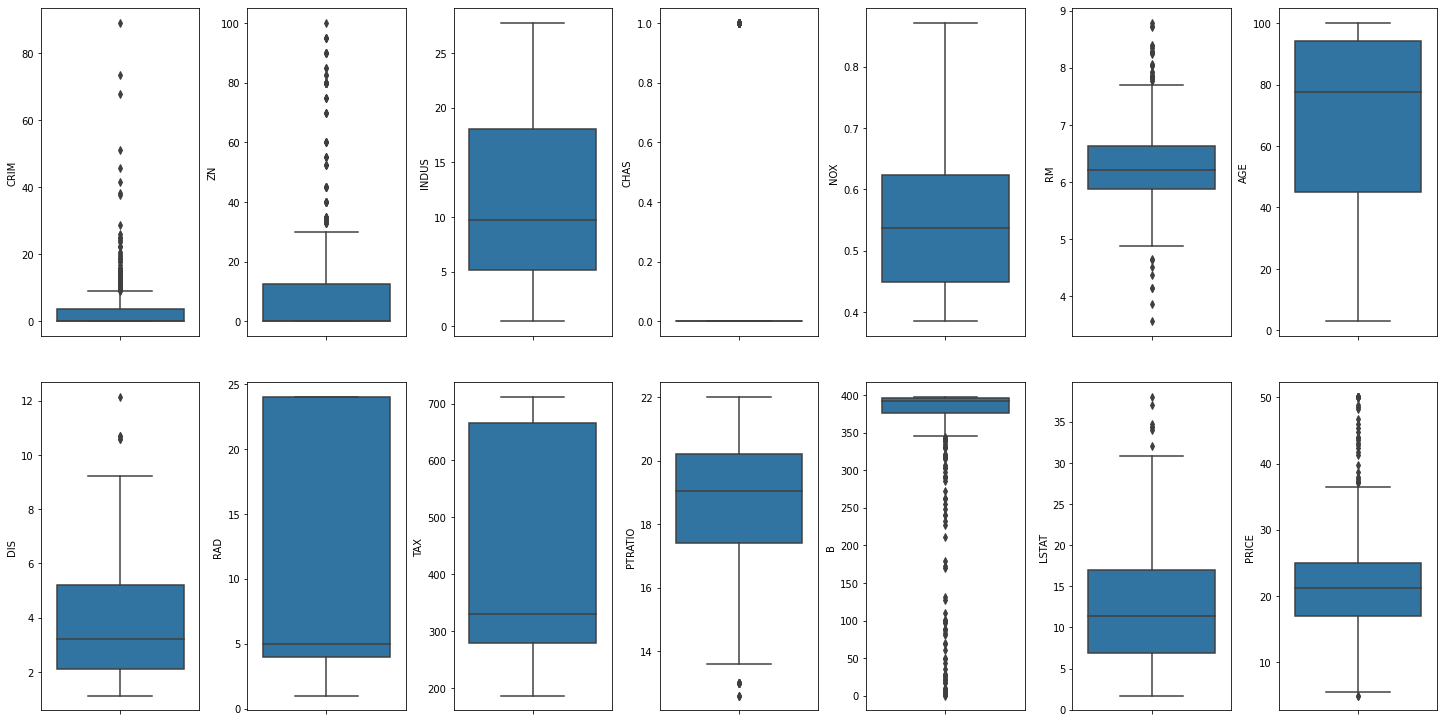

In [66]:
#checking outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.boxplot(y=tar, data=df, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)


<h4>We can see a large number of outliers in CRIM, ZN, RM, B. Lets check the percentage of their outlier. </h4>


In [67]:
#outliers in percentage
for tar,var in df.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))             
                  

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


<h4>Here DIS,CRIM,ZN,B are highly skewed.CHAS is discrete in nature. </h4>

<h1>2. Feature Selection</h1>

In [68]:
#checking the correlation between two features.
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

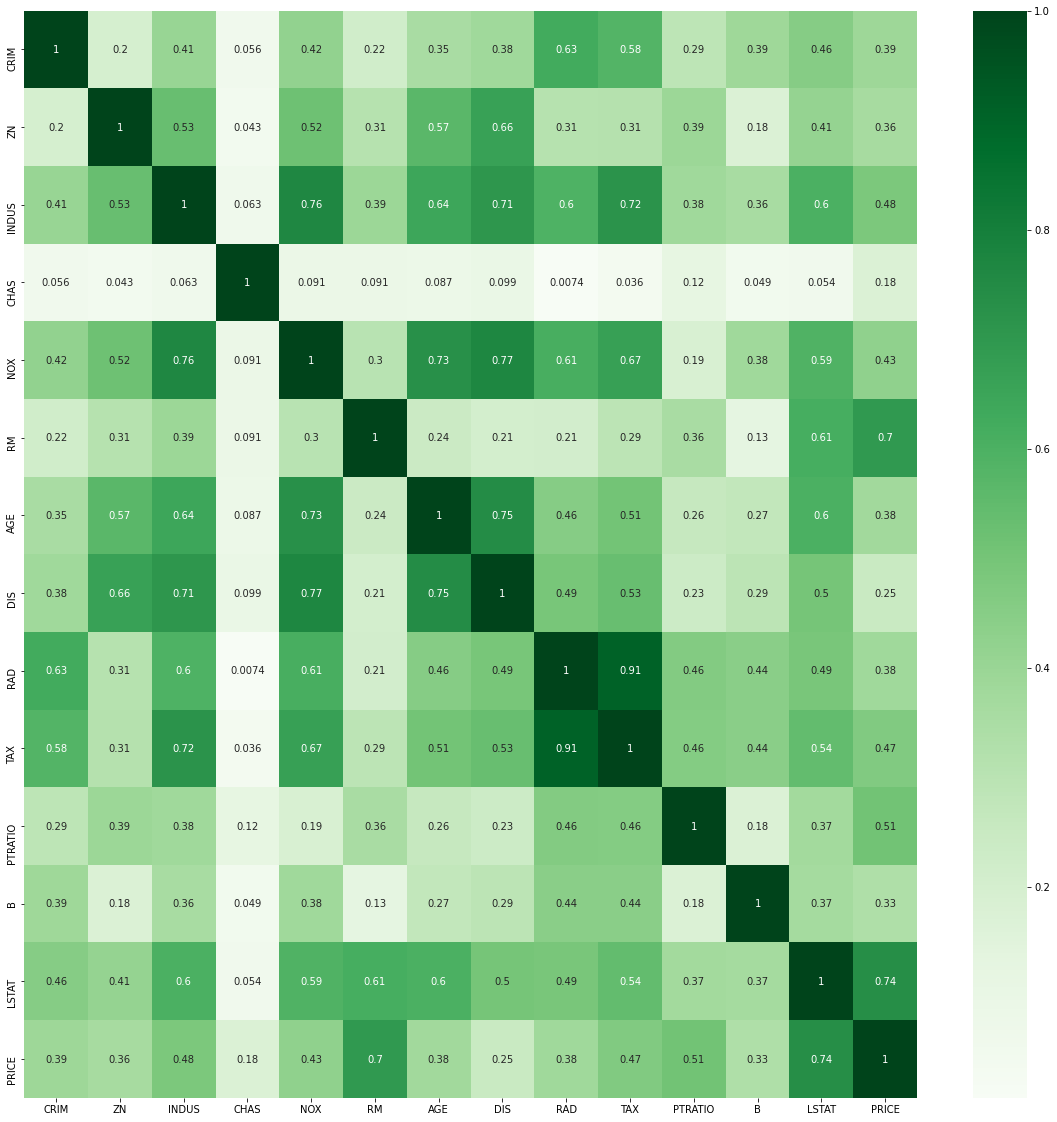

In [69]:
#using a heatmap to see correlation between features more clearly.
plt.figure(figsize=(20,20))
sns.heatmap(corr.abs(), annot=True,cmap='Greens')

<h4>From the correlation matrix RM,LSTAT,TAX,NOX,INDUS,PTRATIO is correlated with PRICE. TAX and RAD is highly correlated with each other(0.91).So, here we get our predictors. </h4>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

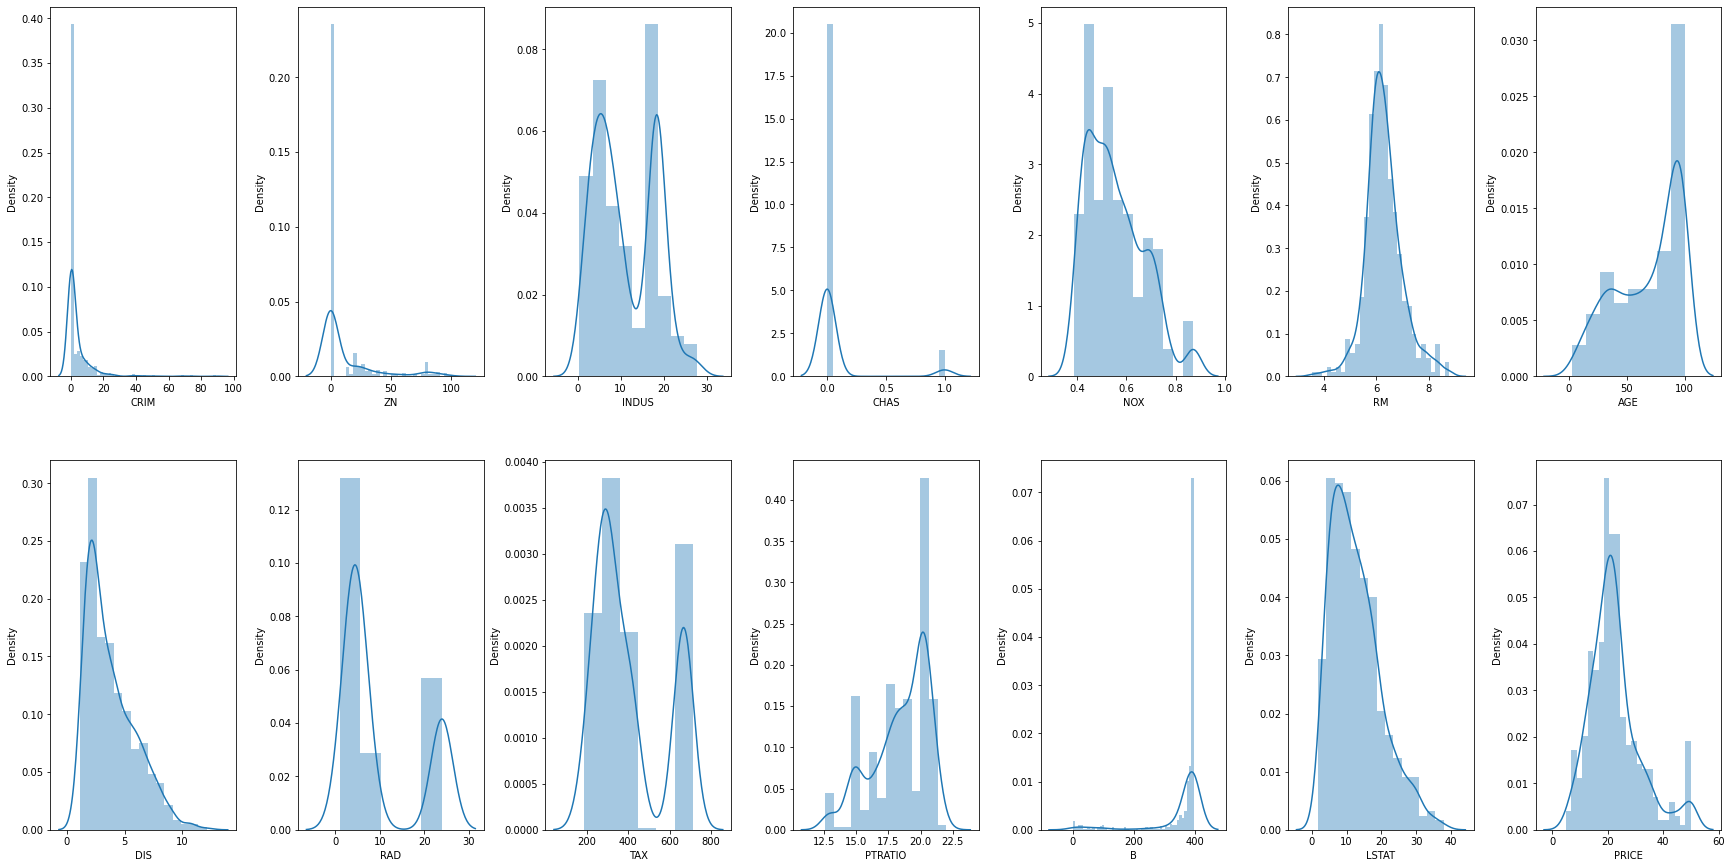

In [70]:
#Checking the skewness in data
fig,axs = plt.subplots(ncols=7, nrows=2, figsize=(24,12))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.distplot(var,ax=axs[count])
    count = count+1
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=5.0)

<h1>3. Model Building and Evaluation</h1>

<h5>Train || Test split procedure</h5>

1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

In [71]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [72]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [73]:
#splitting the data to train and test. checking the validation of the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)

Types of regression algorithms.
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regressor
5. XGBoost Regressor

<h1>1. LINEAR REGRESSION</h1>

In [74]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# Value of y intercept
lm.intercept_

31.478696182125645

In [76]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.145532
1,ZN,0.060672
2,INDUS,-0.000592
3,CHAS,2.355468
4,NOX,-16.023913
5,RM,3.955193
6,AGE,0.000107
7,DIS,-1.562768
8,RAD,0.268553
9,TAX,-0.011798


In [77]:
#predicting on training data
y_pred=lm.predict(X_train)
#Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.7588890959138562
Adjusted R^2 = 0.7480432766989086
MAE = 3.1532948788568427
MSE = 19.163308562607487
RMSE = 4.377591639544224


<h2>Model Validation</h2>

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be normally distributed.
3. The mean of residual error should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=1/(1−R^2) , If VIF=1 no correlation,
If VIF >1 & VIF <5 moderate correlation,
VIF > 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

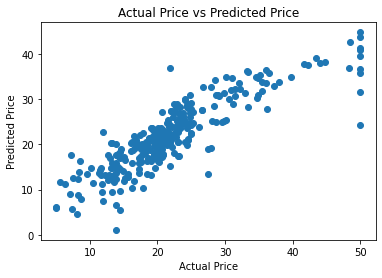

In [78]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


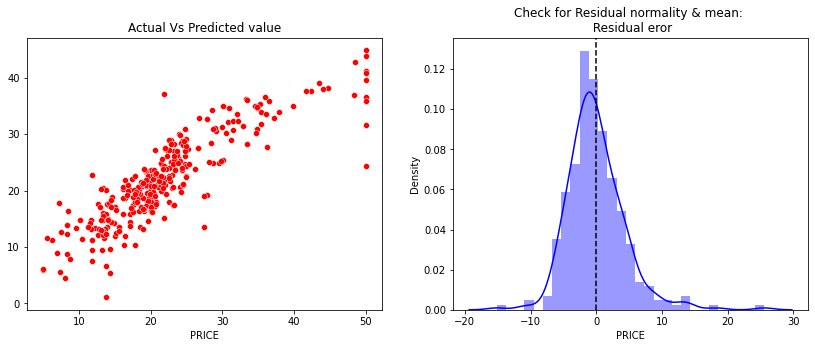

In [79]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [80]:
#Check for Multicollinearity
#Variance Inflation Factor
R_square = lm.score(X_test,y_test)
VIF_LR = 1/(1- R_square)
VIF_LR

3.3970163982366217

1. Actual vs Predicted price is linear in nature.
2. Residuals are normally distributed and it follows normality assumptions.
3. VIF<5 so moderately correlated.

<h2> Predicting ML model on test data.</h2>

In [81]:
#predicting the data using above model
y_tpred= lm.predict(X_test)
#Model Evaluation
tpred_linreg = metrics.r2_score(y_test, y_tpred)
print('R^2:', tpred_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))

R^2: 0.7056240292160214
Adjusted R^2: 0.6853759465695044
MAE: 3.4003389582806567
MSE: 26.750026400940204
RMSE: 5.172042768668894


<h1>2. SVM REGRESSION</h1>

In [82]:
#Standardising the data 
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)


In [83]:
#importing SVM regressor
from sklearn import svm
reg= svm.SVR()

#training the model
reg.fit(X_train,y_train)

SVR()

In [84]:
#Predicting the model on train data
y_pred= reg.predict(X_train)

In [85]:
# Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.6383580025829583
Adjusted R^2 = 0.6220903694811536
MAE = 3.041657965137956
MSE = 28.743026832268185
RMSE = 5.361252356704372


<h2>Model Validation</h2>

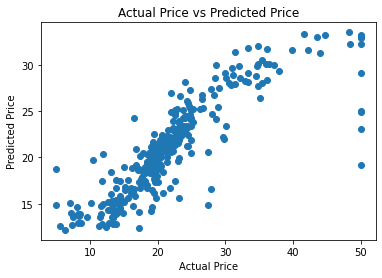

In [86]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

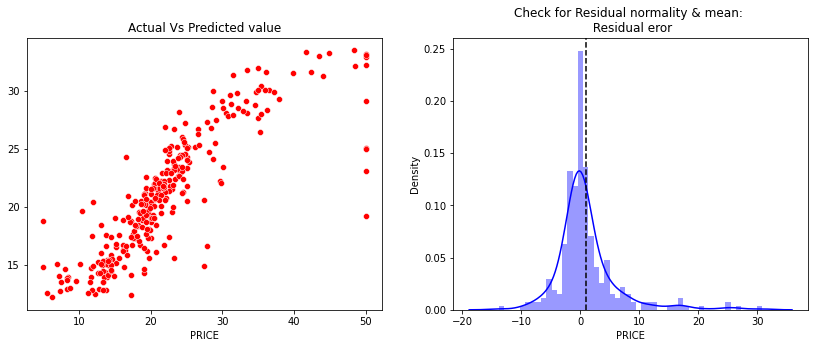

In [87]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

In [88]:
#Check for Multicollinearity using Variance Inflation Factor
R_square = lm.score(X_test,y_test)
VIF_SVR = 1/(1- R_square)
VIF_SVR

0.3047037874027398

<h2> Predicting ML model on test data.</h2>

In [89]:
#predicting the data using our test model
y_tpred= reg.predict(X_test)
#Model Evaluation
tpred_svm = metrics.r2_score(y_test, y_tpred)
print('R^2:', tpred_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))

R^2: 0.5704466626721425
Adjusted R^2: 0.5409006659247237
MAE: 3.6400960735603807
MSE: 39.033631323679806
RMSE: 6.247690079035595


<h1>3. RANDOM FOREST REGRESSOR</h1>

In [119]:
#importing the dataset
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [120]:
#Predicting the model
y_pred=rfr.predict(X_train)

In [121]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9759636295085166
Adjusted R^2: 0.9748824086905605
MAE: 0.8929669966996695
MSE: 1.9103921749174932
RMSE: 1.3821693727316826


Adjusted R^2 value is very good.

<h2>Model Validation</h2>

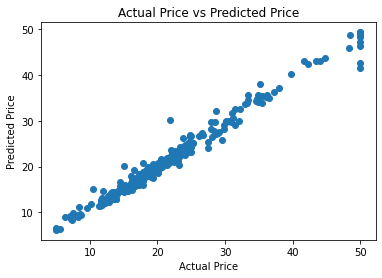

In [122]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

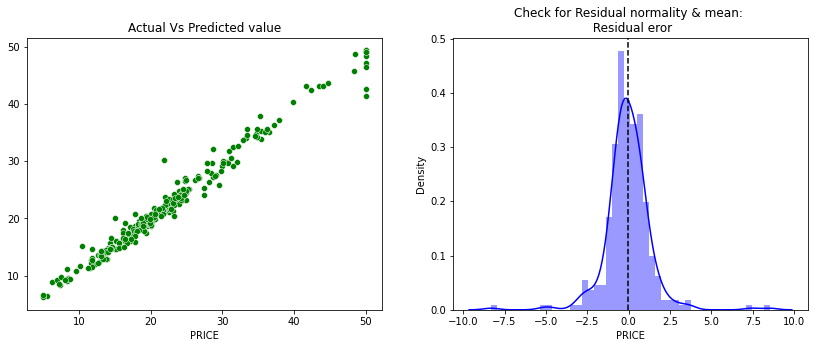

In [123]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='g')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')


Actual price v/s predicted price is almost a straight line. It can be a good model.

In [124]:
#Check for Multicollinearity using Variance Inflation Factor
R_square=rfr.score(X_test,y_test)
VIF_RFR = 1/(1-R_square)
VIF_RFR

7.48717885312922

Model is having very high collinearity.

<h2> Predicting ML model on test data.</h2>

In [125]:
#predicting the data using above model
y_tpred= rfr.predict(X_test)
#Model Evaluation
tpred_rfr = metrics.r2_score(y_test, y_tpred)
print('R^2:',tpred_rfr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))

R^2: 0.866438344853742
Adjusted R^2: 0.8572515643410364
MAE: 2.3286305418719206
MSE: 12.13678477832512
RMSE: 3.4837888538665944


<h1>4. XGBOOOST REGRESSOR</h1>

In [126]:
#importing XGBOOST regression library
from xgboost import XGBRegressor
#
xgbr= XGBRegressor()
#Training the model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

We can change above default values such that our model accuracy is increased in both train and test dataset.

In [127]:
#predicting the model
y_pred=xgbr.predict(X_train)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [128]:
# Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.9999988630269813
Adjusted R^2 = 0.9999988118828662
MAE = 0.006503930107595162
MSE = 9.036573798904984e-05
RMSE = 0.009506089521409413


Adjusted R^2 value is very high which is good for train data. Let us see if it goes well even for test data also.

<h2>Model Validation</h2>

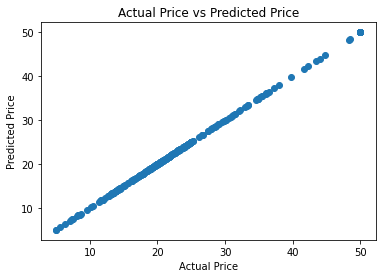

In [129]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Its exactly coming out to be a straight line.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

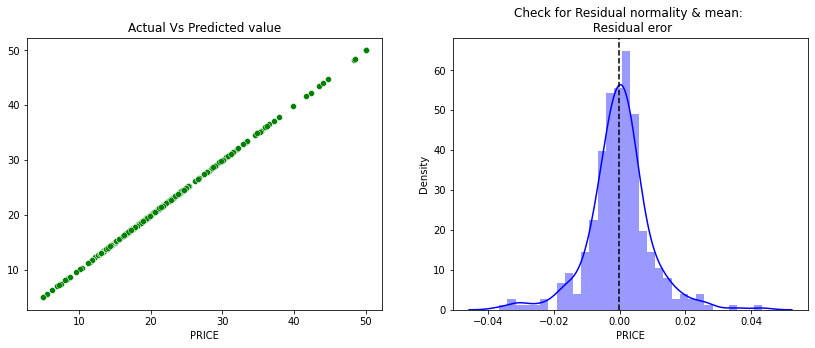

In [134]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='g')
ax.set_title('Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')


In [131]:
#check for Multicollinearity using Variance Inflation Factor
R_square=xgbr.score(X_test,y_test)
VIF_XGBR = 1/(1-R_square)
VIF_XGBR

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


9.031552570337471

VIF_XGBR > 5. i.e model is highly collinear in nature.

<h2> Predicting ML model on test data.</h2>

In [132]:
#predicting the data using above model
y_tpred= xgbr.predict(X_test)
#Model Evaluation
tpred_xgbr = metrics.r2_score(y_test, y_tpred)
print('R^2:',tpred_xgbr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))

R^2: 0.8892770659073256
Adjusted R^2: 0.881661202715766
MAE: 2.2179751959927563
MSE: 10.061423839319021
RMSE: 3.171974753890551


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


<h1> Choosing the best model</h1>

In [136]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [tpred_linreg*100, tpred_rfr*100, tpred_xgbr*100, tpred_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,88.927707
1,Random Forest,86.643834
0,Linear Regression,70.562403
3,Support Vector Machines,57.044666



<h1>OUTCOME :</h1>
<h1>FOR PREDICTING THE HOUSE PRICE IN NEAR FUTURE WE WILL USE THIS XGBOOST MODEL</h1>